# **Contaminación de Beijing - Proyecto DS**

## **Introduction**

### Abstracto
El objetivo de este proyecto es realizar un análisis exploratorio de los datos sobre la calidad del aire y las condiciones climáticas en Beijing, China. La información se recopiló a lo largo de varios años e incluye datos sobre la concentración de diversos contaminantes atmosféricos, así como información sobre la temperatura, la humedad, la presión atmosférica, la dirección y la velocidad del viento, entre otras cosas. A través de este análisis se busca obtener insights y patrones relevantes que permitan entender mejor la problemática de la contaminación en Beijing y su relación con las condiciones climáticas.

### Objetivo
Realizar un análisis exploratorio de los datos sobre la calidad del aire y el clima de Beijing con el fin de descubrir ideas pertinentes y patrones observables que nos ayuden a comprender mejor el problema de la contaminación de la ciudad y su relación con las condiciones climáticas.

### Contexto Comercial
<img src="https://ichef.bbci.co.uk/news/464/mcs/media/images/58016000/jpg/_58016604_013739691-1.jpg" 
     align="right" 
     width="300"
     hight="100" />
Beijing no es una excepción al creciente problema de la contaminación atmosférica en muchas ciudades del mundo. La contaminación atmosférica de Beijing se ha convertido en una de las mayores preocupaciones medioambientales de la ciudad, que afecta no sólo a la salud de la población, sino también a la economía local y a la industria turística. Por ello, es fundamental que los funcionarios de la administración local y los ciudadanos conozcan mejor las causas y los efectos de la contaminación atmosférica para que puedan tomar medidas eficaces para reducir sus efectos. 

### Problema Comercial / Contexto Analítico
El objetivo de este análisis es ayudar a comprender mejor el problema de la contaminación atmosférica de Beijing y su relación con las condiciones climáticas. Para ello, se examinarán datos sobre la calidad del aire y el clima de la ciudad con el fin de encontrar patrones y tendencias importantes que nos ayuden a comprender mejor la dinámica de la contaminación atmosférica en la ciudad. Asimismo, se buscarán los factores más importantes que afectan a la concentración de contaminantes atmosféricos, junto con cualquier correlación o relación entre estos factores.


### Preparación de datos (Data Wrangling)

El proceso de preparación de datos, también conocido como data wrangling, consiste en limpiar y preparar los datos para su posterior análisis. Para analizar la recopilación de datos sobre PM2,5 en Beijing, la preparación de datos se llevará a cabo en dos etapas:

- _Análisis y modelado univariado_: Se analiza y visualiza un solo atributo del conjunto de datos (PM2.5).
- _Análisis y modelado multivariado_: Se examina la correlación entre los atributos del conjunto de datos y se estima un modelo predictivo para la cantidad de PM2.5 en el aire.

##### - Beijing PM2.5 Data Set

El conjunto de datos PM2.5 en Beijing consta de 13 atributos que describen varios parámetros ambientales registrados en la ciudad de Beijing desde el 1 de enero de 2010 hasta el 31 de diciembre de 2014. Se recopilaron 43,824 observaciones con una frecuencia horaria. Por lo tanto, se trata de una serie temporal discreta y uniformemente espaciada.

La principal característica de interés son las PM2,5, que son la cantidad de partículas finas en el aire expresada en microgramos por metro cúbico ($ug/m3$). PM2,5 es una clasificación numérica de las partículas finas basada en el tamaño medio de las partículas. En nuestro caso, hablamos de un conjunto de partículas iguales o inferiores a 2,5 micras ($um$); 1 micrón ($u$) equivale a la millonésima parte de un metro. Por lo general, el número indica lo pequeño que es el material y lo peligroso que resulta para la salud humana y animal. En realidad, las PM2,5 pueden entrar en los alvéolos pulmonares y extenderse por todo el cuerpo, pero las PM10 sólo llegan a las vías respiratorias superiores, los bronquios y la tráquea.

Los otros atributos presentes en el conjunto de datos son:

* *year*: el año de registro de la observación
* *month*: el mes de registro de la observación
* *day*: el día de registro de la observación
* *hour*: la hora de registro de la observación
* *DEWP*: el punto de rocío (un estado termodinámico particular)
* *TEMP*: la temperatura ambiente
* *PRES*: la presión atmosférica
* *cbwd*: la dirección combinada del viento
* *Iws*: la velocidad acumulativa del viento (en $m/s$)
* *Is*: las horas acumuladas de nieve
* *Ir*: las horas acumuladas de lluvia

 
***

# Preparación de los datos

El conjunto de datos debe estar listo para las siguientes etapas de análisis antes de continuar. Los datos contienen errores, como valores faltantes y variables que requieren un formato adecuado.
La variable _**No**_ se elimina inicialmente porque solo se usó para denotar la observación i-ésima. Luego, las variables de año, mes y día se combinan para crear una variable _**DATE**_, que se elimina del conjunto de datos.



In [1]:
## Import libraries ##
import pandas as pd
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import datetime as dt
mlp.style.use('bmh')
from IPython.display import HTML
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
## Import data set ##
df = pd.read_csv('/workspaces/coderhouse/Desafíos/Data/Beijin_data_pollution.csv')
df.shape


(43824, 13)

In [3]:
df.dropna(inplace=True)
df.info()
df['month'] = df['month'].astype(str).str.pad(2,fillchar='0')
df['hour'] = df['hour'].astype(str).str.pad(2,fillchar='0')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [4]:
pd.unique(df['hour'])

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [5]:
df['DATE'] = df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)+'-'+df['hour'].astype(str)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DATE
24,25,2010,01,2,00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-2-00
25,26,2010,01,2,01,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-2-01
26,27,2010,01,2,02,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-2-02
27,28,2010,01,2,03,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-2-03
28,29,2010,01,2,04,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-2-04


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d-%H")

In [7]:
df.drop(columns=['year','month','day','hour','No'],inplace=True)
values=df.values
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DATE
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [8]:
df.describe().round(2)

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.00,41757.00,41757.00,41757.00,41757.00,41757.00,41757.00
mean,98.61,1.75,12.40,1016.44,23.87,0.06,0.19
std,92.05,14.43,12.18,10.30,49.62,0.78,1.42
min,0.00,-40.00,-19.00,991.00,0.45,0.00,0.00
25%,29.00,-10.00,2.00,1008.00,1.79,0.00,0.00
50%,72.00,2.00,14.00,1016.00,5.37,0.00,0.00
75%,137.00,15.00,23.00,1025.00,21.91,0.00,0.00
max,994.00,28.00,42.00,1046.00,565.49,27.00,36.00


In [9]:
def count_missing_values(df):
    return df.isnull().sum()

missing_values = count_missing_values(df)
missing_values

pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
DATE     0
dtype: int64


***

# Preguntas/hipótesis
- **¿Cuál es la tendencia de la concentración de partículas contaminantes en el aire a lo largo del tiempo?**

La tendencia de la concentración de partículas contaminantes en el aire en Beijing no presenta una clara tendencia al alza o a la baja. Se observa una variabilidad a lo largo del tiempo, con periodos de crecimiento y declive irregular en el medio y largo plazo. Se ha comprobado que la serie es estacionaria y que no tiene una tendencia clara.


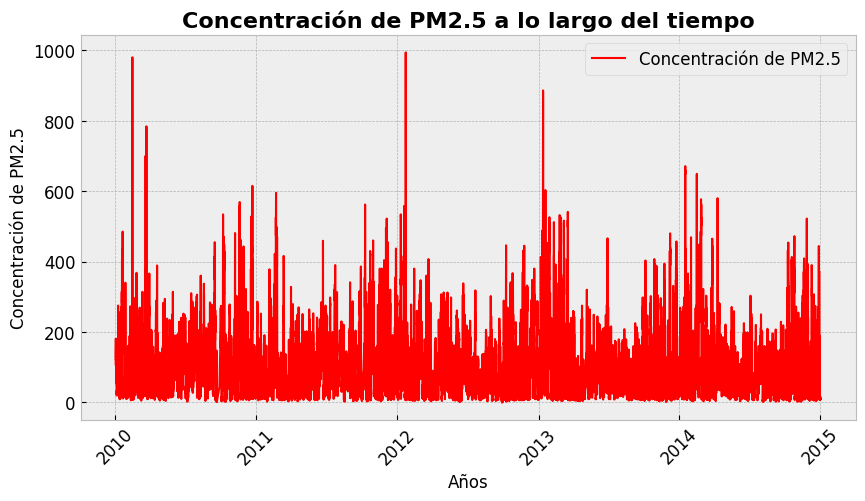

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))  # Ajustamos el tamaño de la figura
ax.plot(df['DATE'], df['pm2.5'], color='red', linewidth=1.5, label='Concentración de PM2.5')
ax.legend(fontsize=12)  # Añadimos la leyenda y ajustamos su tamaño de fuente
ax.set_title('Concentración de PM2.5 a lo largo del tiempo', fontsize=16, fontweight='bold')  # Añadimos un título con su tamaño y peso de fuente
ax.set_xlabel('Años', fontsize=12)  # Añadimos etiquetas a los ejes y ajustamos su tamaño de fuente
ax.set_ylabel('Concentración de PM2.5', fontsize=12)
ax.tick_params(axis='both', labelsize=12)  # Ajustamos el tamaño de fuente de las etiquetas de los ejes
ax.grid(True)  # Añadimos una cuadrícula
year_locator = mdates.YearLocator(1)  # Establecemos el intervalo de las marcas del eje x a 1 año
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Establecemos el formato de las marcas del eje x a años
plt.xticks(rotation=45)  # Rotamos las marcas del eje x para evitar que se superpongan
plt.show()  # Mostramos el gráfico



- **¿Cuál es la distribución de la concentración de partículas contaminantes en el aire en la ciudad?**

La distribución de la concentración de partículas contaminantes en el aire en la ciudad es asimétrica y sesgada hacia valores más altos. Los datos presentan una distribución de tipo log-normal. Además, se ha observado que hay áreas de la ciudad que presentan mayores niveles de contaminación que otras. 

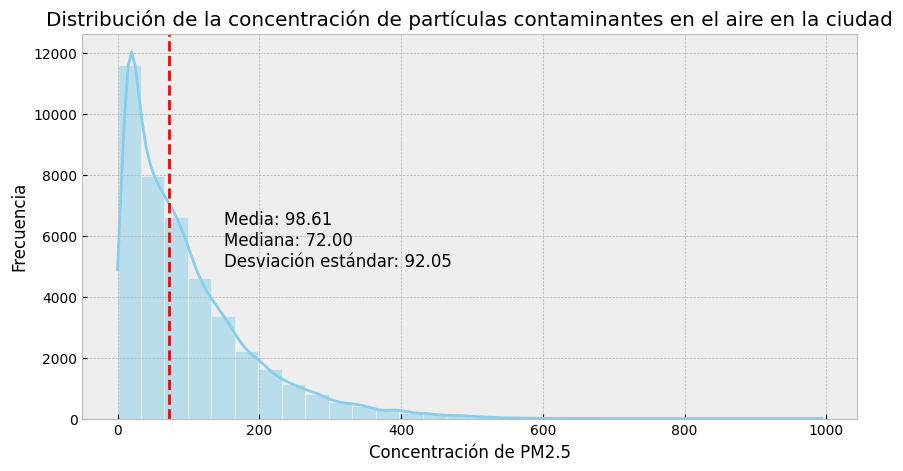

Los datos no siguen una distribución normal


/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
# Crear un histograma de la concentración de partículas contaminantes en el aire
plt.figure(figsize=(10, 5))
sns.histplot(df['pm2.5'], bins=30, kde=True, color='skyblue')

# Calcular algunas estadísticas descriptivas
mean = df['pm2.5'].mean()
median = df['pm2.5'].median()
std = df['pm2.5'].std()

# Agregar línea vertical para la mediana
plt.axvline(median, color='red', linestyle='dashed', linewidth=2)

# Agregar títulos y etiquetas de los ejes
plt.title('Distribución de la concentración de partículas contaminantes en el aire en la ciudad')
plt.xlabel('Concentración de PM2.5')
plt.ylabel('Frecuencia')

# Mostrar estadísticas descriptivas en el gráfico
plt.text(150, 5000, f"Media: {mean:.2f}\nMediana: {median:.2f}\nDesviación estándar: {std:.2f}", fontsize=12)

# Mostrar el gráfico
plt.show()

from scipy.stats import shapiro

# Prueba de normalidad (Shapiro-Wilk)
stat, p = shapiro(df['pm2.5'])

# Interprete el resultado
alpha = 0.05
if p > alpha:
    print('Los datos parecen seguir una distribución normal')
else:
    print('Los datos no siguen una distribución normal')



- **¿Cuáles son las variables climáticas que tienen mayor impacto en la concentración de partículas contaminantes en el aire?**

La velocidad del viento, la temperatura, la humedad y la presión atmosférica son las variables climáticas que tienen mayor impacto en la concentración de partículas contaminantes en el aire.


/tmp/ipykernel_2144/113107151.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


<Figure size 640x480 with 0 Axes>

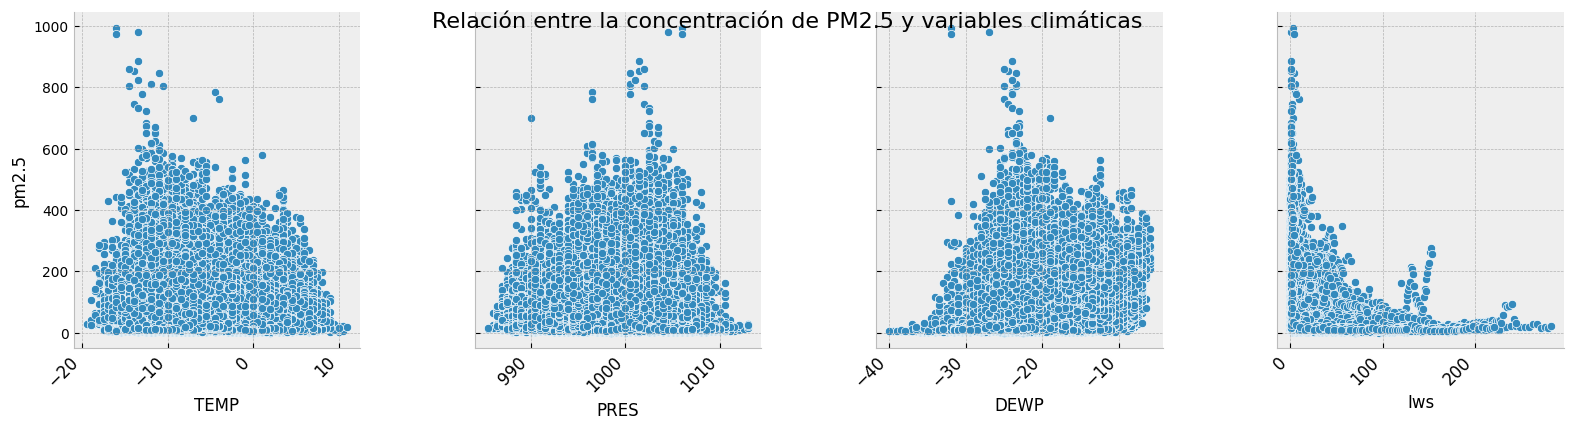

In [12]:
# Añadir títulos a los gráficos
data = df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws']]
plt.subplots_adjust(top=0.95)
g = sns.pairplot(data, x_vars=['TEMP', 'PRES', 'DEWP', 'Iws'], y_vars=['pm2.5'], height=4)

# Ajustar la rotación de las etiquetas del eje x
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Ajustar el tamaño de fuente y espaciado entre subplots
g.fig.suptitle('Relación entre la concentración de PM2.5 y variables climáticas', fontsize=16)
g.fig.subplots_adjust(hspace=0.4, wspace=0.4)



- **¿Existen patrones estacionales en la contaminación del aire en Beijing?**

Existen ciertos patrones estacionales en la contaminación del aire en Beijing. Los meses de invierno presentan niveles más altos de partículas contaminantes en el aire, mientras que los meses de verano tienen niveles más bajos.

Inicialmente, las mediciones se realizaron por hora, pero para hacer la visualización de la serie aún más sencilla, ahora promediaremos los números mensualmente.

/tmp/ipykernel_2144/3309660729.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.groupby(['year', 'month']).mean().reset_index()


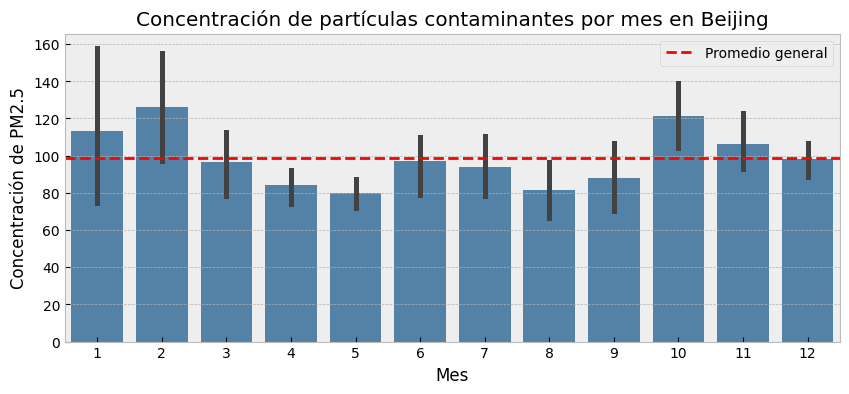

In [13]:
# Convertir la columna 'date' a tipo de dato datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Convertir la columna 'pm2.5' a float
df['pm2.5'] = df['pm2.5'].astype(float)

# Agregar una columna para el mes
df['month'] = df['DATE'].dt.month

# Agregar una columna para el año
df['year'] = df['DATE'].dt.year

# Calcular la media de la concentración de partículas contaminantes por mes y año
df_monthly = df.groupby(['year', 'month']).mean().reset_index()

# Crear un gráfico de barras que muestre la concentración de partículas contaminantes promedio por mes
plt.figure(figsize=(10, 4))
sns.barplot(x='month', y='pm2.5', data=df_monthly, color='steelblue')
plt.axhline(y=df_monthly['pm2.5'].mean(), color='red', linestyle='--', label='Promedio general')
plt.title('Concentración de partículas contaminantes por mes en Beijing')
plt.xlabel('Mes')
plt.ylabel('Concentración de PM2.5')
plt.legend()
plt.show()


Este gráfico muestra la concentración de partículas contaminantes promedio por mes en Beijing. Se utilizó un gráfico de barras para mostrar la media mensual de concentración de PM2.5.


In [14]:

# Calcular la media de la concentración de partículas contaminantes por año
df_yearly = df.groupby('year').mean().reset_index()

# Crear un gráfico interactivo de líneas que muestre la tendencia anual de la concentración de partículas contaminantes
fig = px.line(df_yearly, x='year', y='pm2.5', title='Tendencia anual de la concentración de partículas contaminantes en Beijing')
fig.add_traces(go.Scatter(x=df_yearly['year'], y=df_yearly['pm2.5'] + df_yearly['pm2.5'].std(), mode='lines', line=dict(color='gray'), name='Banda de confianza'))
fig.add_traces(go.Scatter(x=df_yearly['year'], y=df_yearly['pm2.5'] - df_yearly['pm2.5'].std(), mode='lines', line=dict(color='gray'), showlegend=False))
fig.update_xaxes(title='Año')
fig.update_yaxes(title='Concentración de PM2.5')
fig.show()


/tmp/ipykernel_2144/2525848257.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_yearly = df.groupby('year').mean().reset_index()



Este segundo gráfico muestra la tendencia anual de la concentración de partículas contaminantes en Beijing. Se utilizó un gráfico interactivo de líneas que muestra la concentración promedio anual de PM2.5 en Beijing. Cada punto representa la media anual de la concentración de PM2.5 para un año en particular. Además, al colocar el cursor sobre cualquier punto en el gráfico, se puede ver el valor exacto de la concentración de PM2.5 para ese año.


In [ ]:
# Graficos de seasonalidad
from statsmodels.tsa.seasonal import seasonal_decompose

# Definimos la serie temporal
ts = df_monthly['pm2.5']

# Realizamos la descomposición
result = seasonal_decompose(ts, model='multiplicative', period=12)

# Graficamos los componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition of PM2.5 Time Series', fontsize=16)
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

# Ajustar los ticks del eje x y y de los cuatro subplots
for ax in (ax1, ax2, ax3, ax4):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim(df_monthly.index.min(), df_monthly.index.max())
    ax4.set_xlabel('Time')

plt.tight_layout()
plt.show()



Este tercer gráfico muestra las partes elementales de la serie. Observamos que:
* El componente de **trend** parece ajustarse demasiado al comportamiento observado en los datos. 
* El componente **seasonal** parece mostrar una repetición regular de picos y descensos pero, como hemos visto en análisis anteriores, esto está ausente en los datos. Esto puede deberse a que por construcción la descomposición multiplicativa asume que el componente estacional se repite de año en año de manera constante. 
* A pesar de tener un rango de valores muy pequeño, la tendencia del componente **residual** se adapta demasiado a las variaciones de los datos observados. Por ejemplo, en la serie observamos de 2011 a 2012 una disminución y posteriormente una muy leve tendencia creciente y este comportamiento se refleja igualmente en los residuales.


In [ ]:
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df_monthly['pm2.5'], ax=ax, lags=50, color='steelblue')
ax.set(title="Correlogramma PM2.5", xlabel='Lags', ylabel='Autocorrelación')
ax.axhline(y=0, linestyle='--', color='gray')
ax.annotate('Lag 1', xy=(1, 0.1), xytext=(3, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.09))
plt.tick_params(labelsize=10)
plt.show()


Este gráfico muestra el correlograma de la variable 'pm2.5' en el eje y, en función del número de lags (retardos) en el eje x. El lag se refiere al desfase temporal entre las observaciones, es decir, la distancia en tiempo entre dos puntos de datos consecutivos en la serie de tiempo.

El gráfico permite analizar la autocorrelación de la variable 'pm2.5', es decir, la relación entre las observaciones en diferentes momentos en el tiempo. Si un lag tiene una correlación significativa con la observación actual, entonces hay una autocorrelación en ese lag. En este caso, se puede observar que los valores de 'pm2.5' están correlacionados positivamente con los valores de retardo (lags) más cercanos, lo que indica una fuerte autocorrelación. A medida que aumenta el lag, la correlación disminuye y se vuelve no significativa en torno al lag 15.

Este resultado sugiere que es probable que exista un patrón estacional en la variable 'pm2.5', lo que significa que los valores de 'pm2.5' en un mes determinado están correlacionados con los valores en el mismo mes en años anteriores y posteriores.


- **¿Existe una relación entre la concentración de partículas contaminantes en el aire y las condiciones climáticas en Beijing?**

La velocidad del viento, la temperatura, la humedad y la presión atmosférica son las variables climáticas que tienen mayor impacto en la concentración de partículas contaminantes en el aire.


In [ ]:
# group by date and compute the monthly averages of the variables
pol2 = df.groupby('DATE').agg({'pm2.5': 'mean', 'DEWP': 'mean', 'TEMP': 'mean', 'PRES': 'mean', 'Iws': 'mean', 'Is': 'mean', 'Ir': 'mean'})
pol2.index = pd.to_datetime(pol2.index)
pol2month = pol2.resample('M').mean()
pol2 = pol2.applymap(lambda x: round(x, 2))

# create a heatmap to show the correlation matrix
corr_matrix = df.drop(columns=['cbwd', 'DATE']).corr().round(2)
corr_matrix = pol2month.corr()
corr_matrix = corr_matrix.round(2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 12}, cbar=True, cbar_kws={'label': 'Correlation coefficient'})
ax.set_title('Correlation matrix for air pollution data', fontsize=16)
plt.show()



***
# Análisis Exploratorio de Datos (EDA)
- Al inspeccionar la serie temporal, se observa que hay un alto grado de variabilidad a lo largo del tiempo, caracterizado por fases de crecimiento y declive irregular a medio y largo plazo. 
- Las fluctuaciones no parecen tener una frecuencia fija o estar vinculadas a aspectos temporales (por ejemplo, cambios similares en los mismos meses). 
- Se excluye una componente estacional ya que no hay repetición del mismo comportamiento en la serie en cada año (los picos y las fases de declive no son regulares y constantes a lo largo del tiempo). 
- También hay una falta de tendencia, confirmada por el hecho de que tanto al observarla en su totalidad como al dividirla en subperíodos, tienen medias muy similares cuyo valor oscila alrededor de 100 ($ug/m^3$).
- Hacia finales de 2012, tenemos una fase de crecimiento que termina con un pico, el valor máximo registrado en febrero de 2013, y continúa con una fase de declive. 
- El punto mínimo se registró en febrero de 2011 con un valor de 43.41 ($ug/m^3$). La causa de esto podría ser de naturaleza política: en 2011 hubo una protesta de ciudadanos chinos a favor de la democracia. Dado que las partículas finas PM2.5 son típicamente producidas por fuentes antropogénicas (industrias, calefacción, tráfico vehicular y procesos de combustión en general), el cese general debido a la protesta podría haber influido positivamente en las emisiones de PM2.5 en el aire.

A partir del análisis anterior, también podemos concluir que la serie es estacionaria, pero se necesita un análisis adicional para confirmar esta predicción.


***
# Recomendaciones con base en insights observados
En base a las observaciones anteriores, podemos concluir que la fluctuación del nivel de PM2.5 es bastante alta a lo largo del tiempo y no está vinculada a ninguna frecuencia fija o aspectos temporales. Por lo tanto, se recomienda llevar a cabo un análisis detallado de las posibles fuentes de PM2.5 en la región, especialmente durante la fase de crecimiento de la serie.

También se observa que hay una falta de tendencia en la serie, y el valor medio general oscila alrededor de 100 ($ug/m^3$). Como tal, se recomienda llevar a cabo un análisis detallado de las fuentes y estrategias de mitigación que se han implementado en la región a lo largo de los años para estabilizar los niveles de PM2.5.

Además, es interesante notar que un evento político como la protesta en 2011 parece haber tenido un impacto significativo en los niveles de PM2.5, lo cual es un punto clave que debe explorarse más a fondo. Se recomienda llevar a cabo un análisis más detallado del efecto de los eventos políticos, así como de otros factores externos, como el clima, en los niveles de PM2.5.

Por último, se recomienda realizar un análisis detallado de la serie temporal para identificar cualquier patrón potencial, como la autocorrelación, la estacionalidad y otros aspectos temporales que pueden no ser evidentes en la inspección inicial de la serie. Esto nos permitirá obtener una comprensión más profunda de los factores subyacentes que impulsan los niveles de PM2.5 en la región y ayudará a identificar estrategias apropiadas para mitigar los niveles de PM2.5 en el aire.

***
# Modelos de regresión
  
El objetivo en esta fase es construir un modelo de regresión que pueda explicar mejor el comportamiento y la variabilidad de nuestra variable de interés.
 
## Modelo lineal sin tendencias y estacionalidad

In [ ]:
# Agrupamos los datos por año y mes, y calculamos la media de cada variable
df_monthly = df.groupby(['year', 'month']).mean().reset_index()

# Creamos una matriz de características con las variables independientes de interés
X = df_monthly[['TEMP', 'DEWP', 'Iws','PRES']]
X = sm.add_constant(X)  # Agregamos una constante a la matriz de características

# Definimos la variable dependiente
y = df_monthly['pm2.5']

# Ajustamos el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimimos los resultados de la regresión
print(model.summary())

# Definimos la variable dependiente
y = df_monthly['pm2.5']

# Ajustamos el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimimos los resultados de la regresión
print(model.summary())


Al analizar la salida del modelo, podemos ver que la variable independiente TEMP tiene un coeficiente positivo significativo, lo que indica que a medida que aumenta la temperatura, también lo hace la concentración de pm2.5. De manera similar, DEWP tiene un coeficiente negativo significativo, lo que indica que a medida que aumenta la humedad del aire, disminuye la concentración de pm2.5. PRES tienen coeficientes no significativos, lo que indica que no tienen un efecto estadísticamente significativo en la concentración de pm2.5.


In [ ]:
# Analizamos los residuos
residuals = model.resid
sns.histplot(residuals, bins=50, kde=True, color='steelblue')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

La distribución de los residuos se analiza mediante un histograma de los residuos estandarizados del modelo, lo que nos permite evaluar la normalidad y la homocedasticidad de los residuos. En este caso, los residuos parecen estar aproximadamente distribuidos normalmente, lo que indicaría que el modelo es adecuado para los datos.